# Imbalanced Classes in Machine Learning

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


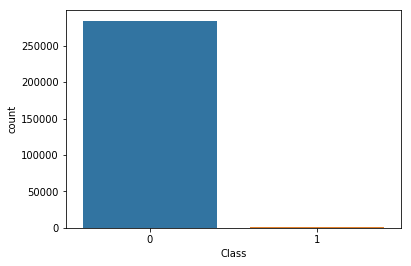

In [5]:
sns.countplot(df['Class'])

In [6]:
len(df[df['Class']==1])/len(df[df['Class']==0]) * 100

0.17304750013189596

###### Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [8]:
y = df.iloc[:,-1].values
X = df.iloc[:,:-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
confusion_matrix(y_test, y_pred)

array([[56850,    14],
       [   39,    59]], dtype=int64)

In [12]:
print(recall_score(y_test, y_pred))

0.6020408163265306


###### Oversampling

In [13]:
from sklearn.utils import resample

In [14]:
data = np.append(arr=X_train, values=y_train.reshape(len(y_train),1), axis=1)
new_df = pd.DataFrame(data, columns=df.columns)
fraud = new_df[new_df['Class']==1]
not_fraud = new_df[new_df['Class']==0]

In [15]:
oversampling = resample(fraud, replace=True, n_samples=len(not_fraud), random_state = 0)

In [16]:
oversampled_dataset = pd.concat([not_fraud, oversampling])
oversampled_dataset['Class'].value_counts()

1.0    227451
0.0    227451
Name: Class, dtype: int64

In [17]:
X_train_os = oversampled_dataset.iloc[:,:-1]
y_train_os = oversampled_dataset.iloc[:,-1]

In [18]:
oversampled_lr = LogisticRegression(solver='liblinear').fit(X_train_os, y_train_os)

In [19]:
y_pred_os = oversampled_lr.predict(X_test)

In [20]:
print(recall_score(y_test, y_pred_os))

0.8673469387755102


###### Undersampling

In [21]:
undersampling = resample(not_fraud, replace=True, n_samples=len(fraud), random_state=0)

In [22]:
undersampled_dataset = pd.concat([fraud, undersampling])
undersampled_dataset['Class'].value_counts()

0.0    394
1.0    394
Name: Class, dtype: int64

In [23]:
X_train_us = undersampled_dataset.iloc[:,:-1]
y_train_us = undersampled_dataset.iloc[:,-1]

In [24]:
undersampled_lr = LogisticRegression(solver='liblinear').fit(X_train_us, y_train_us)

In [25]:
y_pred_us = undersampled_lr.predict(X_test)

In [26]:
print(recall_score(y_test, y_pred_us))

0.8775510204081632


###### SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=0, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [29]:
smote_lr = LogisticRegression(solver='liblinear').fit(X_train_sm, y_train_sm)
y_pred_sm = smote_lr.predict(X_test)

In [30]:
print(recall_score(y_test, y_pred_sm))

0.8673469387755102


###### Anomaly Detection Algorithm: One Class SVM

In [31]:
from sklearn.svm import OneClassSVM

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [33]:
svm = OneClassSVM()

In [34]:
svm.fit(X_train, y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='rbf', max_iter=-1, nu=0.5, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred_svm = svm.predict(X_test)

In [43]:
print(recall_score(y_test, y_pred_svm))

0.6224489795918368
